# Supervised Learning
## Overfitting and Regularization

Alexander Goncearenco

March 7, 2019

### Recap supervised learning and regression

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

# boston.DESCR.splitlines()
# ?load_boston

In [2]:
"X:", X.shape, "y:", y.shape

('X:', (506, 13), 'y:', (506,))

In [3]:
from sklearn.linear_model import LinearRegression

lr_house_price = LinearRegression().fit(X, y)
lr_house_price.score(X, y)

#retruns r^2 the closer to 1 the better our prediction is 

0.7406426641094095

In [7]:
predicted_price = lr_house_price.predict(X)

In [8]:
predicted_price.shape

(506,)

In [13]:
%matplotlib inline

import pandas as pd
import seaborn as sb

d = pd.DataFrame(X)
d['predicted_price'] = pd.Series(predicted_price)
d['actual_price'] = pd.Series(y)

ModuleNotFoundError: No module named 'seaborn'

In [8]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,predicted_price,actual_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.003843,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.025562,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.567597,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.607036,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.943524,36.2


### How we evaluate performance of models?

$SE= (\hat y-y)^2$ this returns a bunch of squared errors 

In [9]:
# Squared error for each example:
#returns a vector 
d['squared_error'] = (d['predicted_price'] - d['actual_price'])**2
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,predicted_price,actual_price,squared_error
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.003843,24.0,36.046135
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,25.025562,21.6,11.734478
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,30.567597,34.7,17.076757
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.607036,33.4,22.972499
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,27.943524,36.2,68.169392


In [10]:
# Overall performance: mean squared error:

-d['squared_error'].mean()

-21.894831181729202

In [12]:
# It is the same as mean_squared_error in scikit-learn

from sklearn.metrics import mean_squared_error
mean_squared_error(d['actual_price'], d['predicted_price'])

NameError: name 'd' is not defined

In [10]:
import numpy as np

In [11]:
# Sometimes Root Mean Squared Error (RMSE) is used
# RMSE preserves the scale of the units (e.g. price in dollars)
np.sqrt(mean_squared_error(d['actual_price'], d['predicted_price']))

NameError: name 'mean_squared_error' is not defined

## But will the model be able to predict the future cases?

Remember what happens when we train and predict using KNearestNeighbors(K=1)?

the model carries with it and uses my info to predict me of course this is gonna be right N_neighbors=1

In [18]:
from sklearn.neighbors import KNeighborsRegressor
#fit returns the train model 
#predict is a method of the model 
predicted_price = KNeighborsRegressor(n_neighbors=2).fit(X, y).predict(X)
actual_price = y
mean_squared_error(actual_price, predicted_price)

12.133522727272727

if we change this to 2 can't just use my info you have to use my info, when its 2 you take the mean of the salries and avergae this 
why is 1 bad? it overfits the data, can't expect your perfect clone make the decisions about the data 

testing the model on data it hasnt seen before when you use 2 


### Solution: split the dataset

The learning algorithm uses examples only from the training set and it cannot use examples from any of the holdout sets.

* Training set (70% - 95%)

* Holdout sets: (5% - 30%)
    - Validation set
    - Test set
    

We want good performance on a holdout set, using the data the model has not seen before!

for the first fold take 90 leave 10 
then switch 10 for sset aside then 90 for testing 

split the dtaaa 10x

1st 10% test 
2nd the 90% is the tets 

5 fold 80-20 

we keep testing until we get no overlap 


#### Why do we need two holdout sets?

We need validation set to choose the learning algorithm and its hyperparameters.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.shape, y_train.shape

((339, 13), (339,))

In [22]:
X_test.shape, y_test.shape

((167, 13), (167,))

In [23]:
# Linear Regression

predicted_price = LinearRegression().fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_price)

20.724023437339717

In [25]:
# KNN Regression(K=1)

predicted_price = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_price)

#k=1 is almost never the optimal k to have 

29.192468396540256

In [28]:
from sklearn.ensemble import RandomForestRegressor

predicted_price= KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_price)

29.192468396540256

In [29]:
from sklearn.ensemble import DecisionTreeRegressor

predicted_price= DecisionTreeRegressor().fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, predicted_price)

ImportError: cannot import name 'DecisionTreeRegressor' from 'sklearn.ensemble' (/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/__init__.py)

### Overfitting and Underfitting


* Overfitting - model performs well on the training set but performs poorly on the test set

* Underfitting - model does not perform well on the training set but its performance on test set is not much different


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#this sets up a bunch of steps in a pipeline 

X12 = X[:, 12].reshape(-1, 1) # only one feature only but maintain 2D array shape
X12_train, X12_test, y_train, y_test = train_test_split(X12, y, test_size=0.33, random_state=42)

In [32]:
X12

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [33]:
X12.flatten().shape

(506,)

In [34]:
X12.flatten

<function ndarray.flatten>

### Examples of underfitting and overfitting:

m1 - Linear Regression

m2 - Polynomial regression of the second degree

m5 - Polynomial regression of the fifth degree

#### Model m1:

$$ y = \beta_1 x + \beta_0 $$

In [42]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(X12_train, y_train)
m1_train_predicted = m1.predict(X12_train)
m1_test_predicted = m1.predict(X12_test)

we only use 1 predictor unlike we did in the previous code up above 

if its not importasnt predictor it get a low coefficent in the model so linear regression takes care of that for us 


In [22]:
mean_squared_error(y_train, m1_train_predicted)

38.71120361270592

In [23]:
mean_squared_error(y_test, m1_test_predicted)

38.410075117662345

In [40]:
import seaborn as sb

In [38]:
pip install seaborn

     |████████████████████████████████| 215kB 3.3MB/s 
Note: you may need to restart the kernel to use updated packages.


In [35]:
sb.scatterplot(X12_train.flatten(), y_train)
sb.scatterplot(X12_train.flatten(), m1_train_predicted)

NameError: name 'sb' is not defined

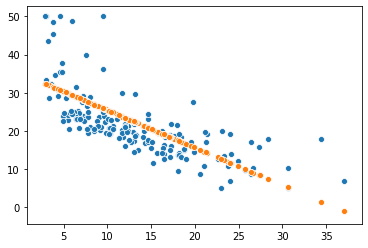

In [43]:
sb.scatterplot(X12_test.flatten(), y_test)
sb.scatterplot(X12_test.flatten(), m1_test_predicted)

#### Model m2:

$$ y = \beta_1 x + \beta_2 x^2 +  \beta_0 $$

we now use this to do a second degree polynomial 

x can now be squared which is like a second variable 

x1 

In [26]:
m2 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=True))])
m2.fit(X12_train, y_train)
m2_train_predicted = m2.predict(X12_train)
m2_test_predicted = m2.predict(X12_test)

In [27]:
mean_squared_error(y_train, m2_train_predicted) #this is the training error

29.442905187577004

In [28]:
mean_squared_error(y_test, m2_test_predicted)

32.51162005950131

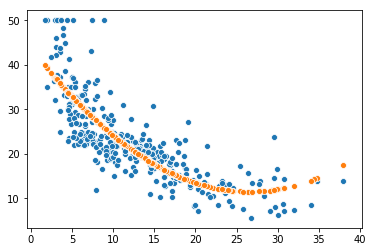

In [29]:
sb.scatterplot(X12_train.flatten(), y_train)
sb.scatterplot(X12_train.flatten(), m2_train_predicted)

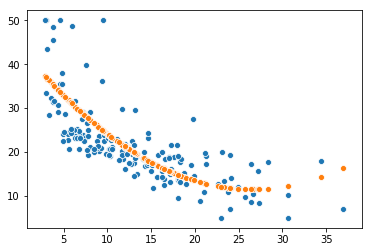

In [30]:
sb.scatterplot(X12_test.flatten(), y_test)
sb.scatterplot(X12_test.flatten(), m2_test_predicted)

#### Model m10:

$$ y = \beta_1 x + \beta_2 x^2 +  \beta_3 x^3 +  ... + \beta_{10} x^{10} + \beta_0 $$

In [37]:
m10 = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=True))])
m10.fit(X12_train, y_train)
m10_train_predicted = m10.predict(X12_train)
m10_test_predicted = m10.predict(X12_test)

In [38]:
mean_squared_error(y_train, m10_train_predicted)

25.73897546019498

In [39]:
mean_squared_error(y_test, m10_test_predicted)

29.210589562808984

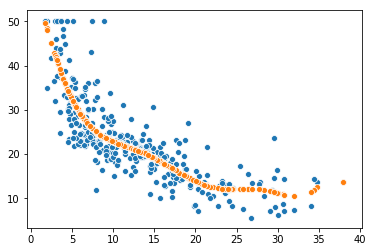

In [40]:
sb.scatterplot(X12_train.flatten(), y_train)
sb.scatterplot(X12_train.flatten(), m10_train_predicted)

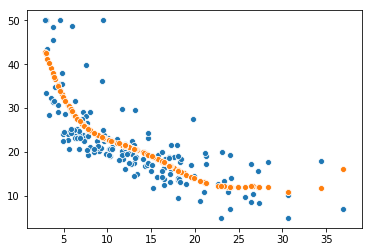

In [41]:
sb.scatterplot(X12_test.flatten(), y_test)
sb.scatterplot(X12_test.flatten(), m10_test_predicted)

### Let us summarize the models' errors

In [42]:
print("M1 train", round(mean_squared_error(y_train, m1_train_predicted)))
print("M1 test", round(mean_squared_error(y_test, m1_test_predicted)))
      
print("M2 train", round(mean_squared_error(y_train, m2_train_predicted)))
print("M2 test", round(mean_squared_error(y_test, m2_test_predicted)))

print("M10 train", round(mean_squared_error(y_train, m10_train_predicted)))
print("M10 test", round(mean_squared_error(y_test, m10_test_predicted)))

M1 train 39.0
M1 test 38.0
M2 train 29.0
M2 test 33.0
M10 train 26.0
M10 test 29.0


We will talk about model selection and feature selection in mode detail in one of the next classes.

### Is there only one way to split the dataset? Cross-validation

Cross-validation is reusing the dataset and creates multiple train-holdout subset pairs.

The major assumption is that our whole dataset is a representative sample. By taking the random subsamples from the whole dataset we can estimate the performance of the model on previously unseen data.

#### LeaveOneOut

LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  n samples, we have  n different training sets and  n different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set

##### KFold
KFold divides all the samples in  k groups of samples, called folds (if  k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using 
k−1folds, and the fold left out is used for test.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0041.png)

#### ShuffleSplit

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0061.png)

#### TimeSeriesSplit

TimeSeriesSplit is a variation of k-fold which returns first 
k folds as train set and the (k+1)th fold as test set. Note that unlike standard cross-validation methods, successive training sets are supersets of those that come before them. Also, it adds all surplus data to the first training partition, which is always used to train the model.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0101.png)

In [43]:
KNeighborsRegressor().fit(X, y).score(X, y)

0.716098217736928

0.7079649368669324

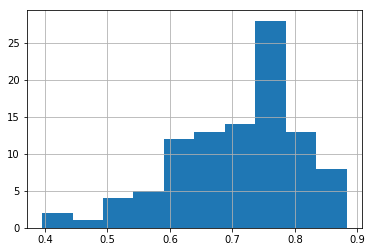

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

# here we try to maximize the score, that is why neg_mean_squared_error
# essentially, score = - cost_function
s = cross_val_score(reg, X, y, cv=cv)
pd.Series(s).hist()
s.mean() # R^2

In [45]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### Bias - Variance Tradeoff

The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).


The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

### Let's plot some learning curves

In [46]:
#From http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

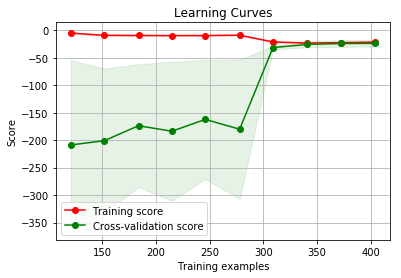

In [47]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
model = LinearRegression()
model = KNeighborsRegressor(n_neighbors=2)
plot_learning_curve(model, title, X, y, cv=cv_iterator, n_jobs=4)
#if we change neighbors to 1- the training set is good but 
plt.show()

good fit means both have platued but the most important is getting a good test score

linear regression does better for this problem compared to the other k values 

#### Lasso Regression

“when you have two competing theories that make exactly the same predictions, the simpler one is the better.” - William of Ockham

So for a regression model LASSO (least absolute shrinkage and selection operator), or more commonly referred to as L1 regularization, could be used to penalize for the large number of parameters.

* L1 regularization (the last term of the equation) favors a sparse model with  features having coefficients equal to zero or close to zero:

$$ Loss =  ||y - Xw||^2_2 + \alpha * ||w||_1$$

L1 norm $||w||_1$ is simply a sum of absolute values of coefficients and $\alpha$ regulates the strength of regularization. A zero coefficient for a feature essentially mean that the feature is eliminated.



includes the addition of a penalty score 

In [1]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
#constant multipliee by the penalty and asses the strenght of the variation 
llr = Lasso(alpha=0.5)
llr.fit(X, y)
preds = llr.predict(X)

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

# Note: default in sklearn: higher return values are better than lower return values
cross_val_score(llr, X, y, cv=cv_iterator, scoring="neg_mean_squared_error")
cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")
abs(np.mean(cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")))

NameError: name 'X' is not defined

cross val scores gives us the scores back from the function and helps with cross validtion 

In [ ]:
Lasso #alpha is the regularization strength 

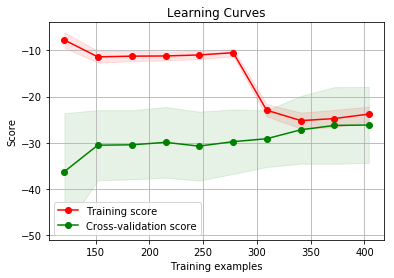

In [49]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
llr = Lasso(alpha=0.5)

plot_learning_curve(llr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,
 

$$ Loss = ||y - Xw||^2_2 + \alpha * ||w||^2_2$$

Here, 
α
≥
0
 is a complexity parameter that controls the amount of shrinkage: the larger the value of 
α
, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

we get out the # of folds from function - lasso

ridge- 



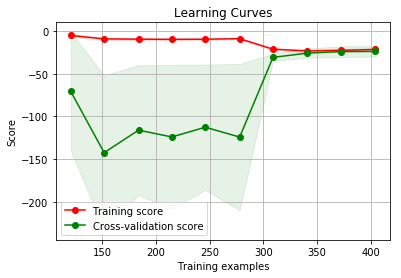

In [50]:
from sklearn.linear_model import Ridge

title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
llr = Ridge(alpha=0.5)

plot_learning_curve(llr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

#how many samples to get in this sweet spot (100 samples)

## Optimizing hyperparameters with GridSearchCV


In [84]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter optimization:
# (Hyper)parameter grid
p_grid = {
    "n_neighbors": [1, 3, 5, 7, 9]
}

# Note that GridSearchCV requires a cross-validation scenario, in this case KFold

knnr = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knnr, param_grid=p_grid, cv=KFold(n_splits=5), iid=False)
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

returns this grid search cv= allows us to make our code with these parameters 

In [85]:
# exploring the results of hyperparameter search using 5-fold cross-validation

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    df_cv_results = pd.DataFrame(grid_search.cv_results_)

df_cv_results(headO)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000503,0.000254,0.000952,0.000117,1,{'n_neighbors': 1},-2.627907,-0.236199,-0.600097,-0.076035,...,-1.027172,0.958977,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000326,0.000015,0.001007,0.000028,3,{'n_neighbors': 3},-1.310098,0.217386,-0.466775,-0.026002,...,-0.380546,0.521293,4,0.808260,0.798374,0.780439,0.790868,0.742080,0.784004,0.022857
2,0.000333,0.000009,0.001082,0.000138,5,{'n_neighbors': 5},-1.109212,0.149350,-0.425920,-0.014744,...,-0.315016,0.440130,3,0.749761,0.710013,0.730012,0.731433,0.652018,0.714647,0.033748
3,0.000343,0.000006,0.001080,0.000080,7,{'n_neighbors': 7},-1.008152,0.166533,-0.438516,0.031234,...,-0.305335,0.411919,2,0.698621,0.666551,0.658143,0.695848,0.621603,0.668153,0.028160
4,0.000358,0.000011,0.001142,0.000121,9,{'n_neighbors': 9},-1.008267,0.156244,-0.390139,0.039706,...,-0.274295,0.411625,1,0.661207,0.635898,0.611750,0.651373,0.579808,0.628007,0.029319


nneighbor vs the mean test scoe, we get the mean score for each split 

In [73]:
grid_search.best_params_

{'n_neighbors': 9}

In [75]:
grid_search.best_score_#this is the best mean test score for the scores 

-0.27429538641415063

In [76]:
grid_search.best_estimator_#the actual model with the hyoerparameters . 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform')

In [83]:
best_model = grid_search.best_estimator_
pd.Series(best_model.predict(X)).head()

0    22.333333
1    22.088889
2    23.122222
3    24.600000
4    23.922222
dtype: float64

## Nested GridSearchCV cross-validation

In [86]:
# CV iterators
inner_cv_iterator = ShuffleSplit(n_splits=20, random_state=10)
outer_cv_iterator = KFold(n_splits=10, shuffle=True, random_state=10)

# Hyperparameter optimization:

# (Hyper)parameter grid
p_grid = {
    "n_neighbors": [1, 3, 5, 7, 9]
}

knnr = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knnr, param_grid=p_grid, cv=inner_cv_iterator)

cross_val_score(estimator=grid_search, X=X, y=y, cv=outer_cv_iterator)

array([0.56587668, 0.47906321, 0.46745653, 0.67292231, 0.52349235,
       0.72262197, 0.68445332, 0.46320908, 0.39704074, 0.37277133])

grid search = define the best hyperpaameters 

after this we need to use the best one dserperate from the hyperparameter search to mke ths process more reliab;e 


this can ensure there isn't overfitting occuring on the datset and evaluating the model 

w could be overfitting the split and the cross val score makes this more unbiased 

lasso= look up lasso python 
-log of alpha 
since we look at the negative log of alpha alpha will . e small, the coefficients on the y will be large values, as alpha increases the coefficients are shrunk down and one you get to a penalty wever enough the coefficients are 0 

where all of the coefficients =0 we're predicting a consrant->intercept 
once we get here beta is always 0 regardless of the data
this can tell us how important the coefficients actually are 

-log alpha being 1 - what is tge apha values that minimizes error 

another way is to use lasso model with shrunken coefficient 
thus helps us to undertsand the value of the coefficients 
the ones that remain at the highest values are the strongest variables 

elastic net-blend of ridge and lasso 